In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('../datasets/USAverage_Energy_CO2_1970to2021.csv')

In [3]:
#checking what we got here 
df.head()

,Year,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
0,1970,21.733333,240566.5294,425347.2941,4693.098039,578433.6078,79804.33333
1,1971,21.880392,227513.7451,438534.2549,8096.843137,598852.0588,83572.74510
2,1972,22.996078,237441.7647,444754.8235,11446.098040,645473.6471,85921.68627
3,1973,23.625490,254119.9804,443045.9608,17846.627450,682471.1569,86489.03922
4,1974,22.750980,248058.9608,426069.7647,24942.843140,655306.1569,92977.49020


In [4]:
# setting year as the index 
df.set_index('Year', inplace=True)

In [5]:
# Convert the index to a DatetimeIndex because the 
# that's the way seasonal_decompose wants it
df.index = pd.to_datetime(df.index, format='%Y')

In [6]:
# double checking 
df.head()

,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
Year,,,,,,
1970-01-01,21.733333,240566.5294,425347.2941,4693.098039,578433.6078,79804.33333
1971-01-01,21.880392,227513.7451,438534.2549,8096.843137,598852.0588,83572.74510
1972-01-01,22.996078,237441.7647,444754.8235,11446.098040,645473.6471,85921.68627
1973-01-01,23.625490,254119.9804,443045.9608,17846.627450,682471.1569,86489.03922
1974-01-01,22.750980,248058.9608,426069.7647,24942.843140,655306.1569,92977.49020


In [7]:
df.shape

(52, 6)

In [8]:
df.dtypes

CO2_Value                 float64
Coal_Value                float64
Natural_Gas_Value         float64
Nuclear_Energy_Value      float64
Petroleum_Energy_Value    float64
Renewable_Energy_Value    float64
dtype: object

# Linear Time Series Modeling

In [9]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

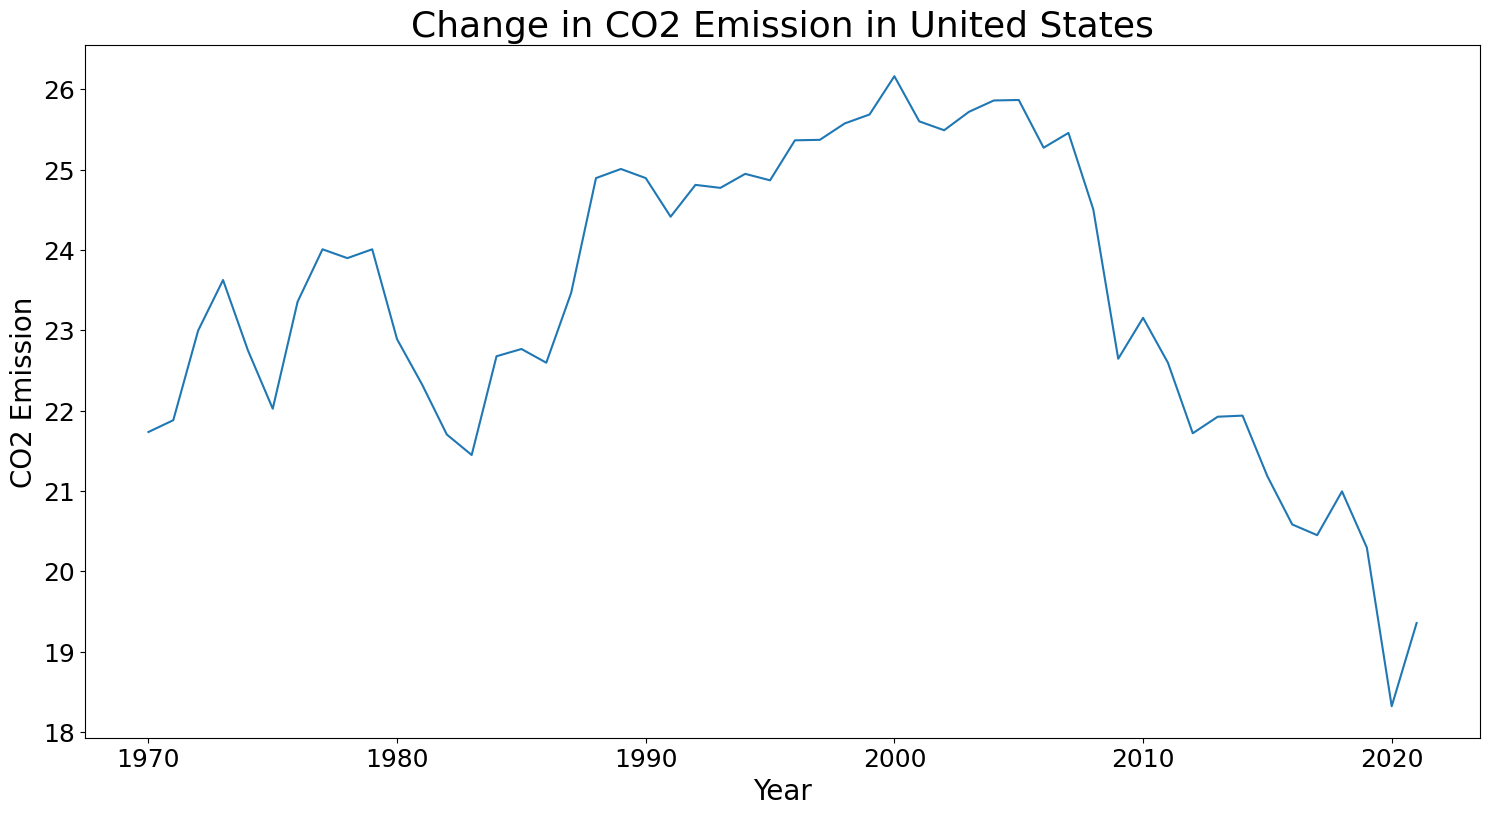

In [10]:
# looking at the changes in Co2 emission
plot_series(df, cols = ['CO2_Value'], title = "Change in CO2 Emission in United States", xlab="Year", ylab="CO2 Emission")

# Interpretation
____

Based on this plot, the general trend for CO2 emission is going down from 1970 to 2020. Starting from roughly 2007, the CO2 emission appears to be going down. 

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

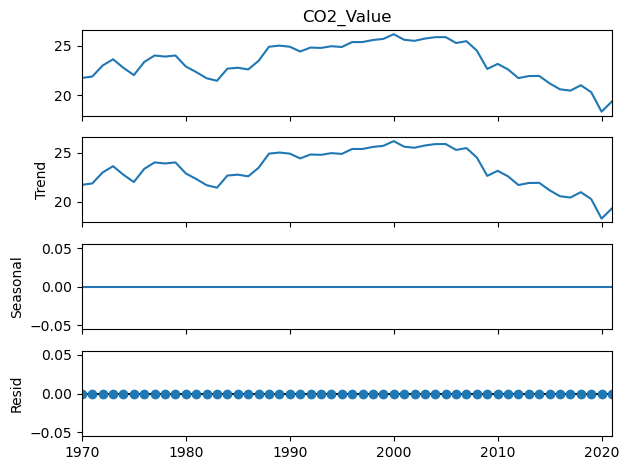

In [12]:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(df['CO2_Value'])
 
# Plot the decomposed time series.
decomp.plot();

# CO2 Interpretation
_____

For the trend plot, we observe the general trend of CO2 emission going down from 1970 to 2021. However, between 1990 and 2000, there is a slight increase in the CO2 emission before it gradually comes down from early 2000s and onward. As for the seasonal trend, there doesn't seem to be any pattern and is at constant value of 0. For the residual trend, it appears that there is no pattern.

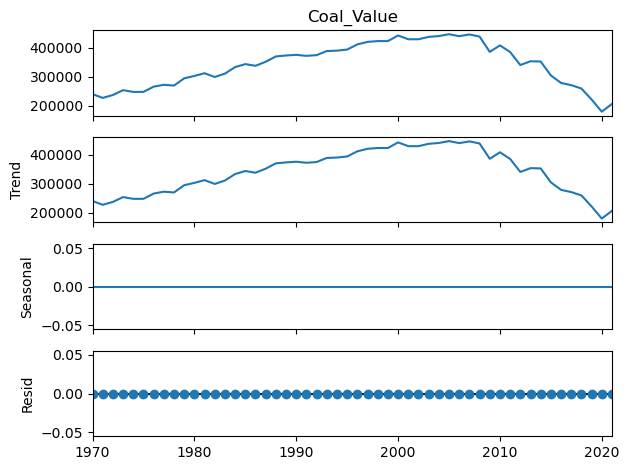

In [13]:
# Decompose time series into trend, seasonal, and residual components for Coal Value
decomp = seasonal_decompose(df['Coal_Value'])
 
# Plot the decomposed time series.
decomp.plot();

# Coal Interpretation
_____

For the trend plot, we observe the general trend of coal energy consumption going down from 1970 to 2021. However, between 1990 and 2000, there is a slight increase in the CO2 emission before it gradually comes down around 2009 and onward. As for the seasonal trend, there doesn't seem to be any pattern and is at constant value of 0. For the residual trend, it appears that there is no pattern.

To note, the coal trend plot seems to follow similiar trend like that of the CO2 trend plot. 

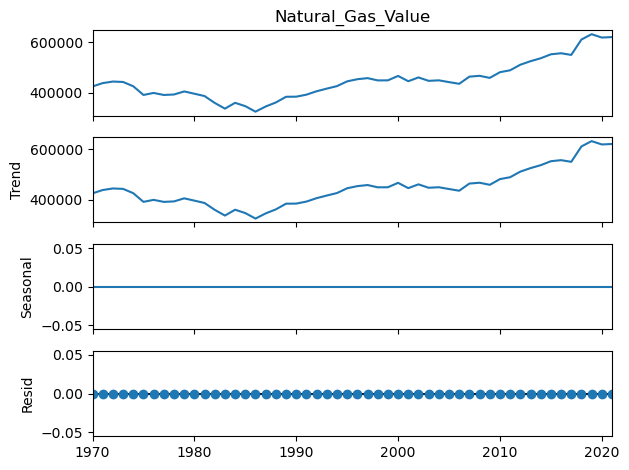

In [14]:
# Decompose time series into trend, seasonal, and residual components for Coal Value
decomp = seasonal_decompose(df['Natural_Gas_Value'])
 
# Plot the decomposed time series.
decomp.plot();

# Natural Gas Interpretation
_______

For the trend plot, we observe the general trend of natural gas energy consumption going up from 1970 to 2021. However, we observe the natural gas at its lowest point in 1985 before gradually increasing afterwards. As for the seasonal trend, there doesn't seem to be any pattern and is at constant value of 0. For the residual trend, it appears that there is no pattern.


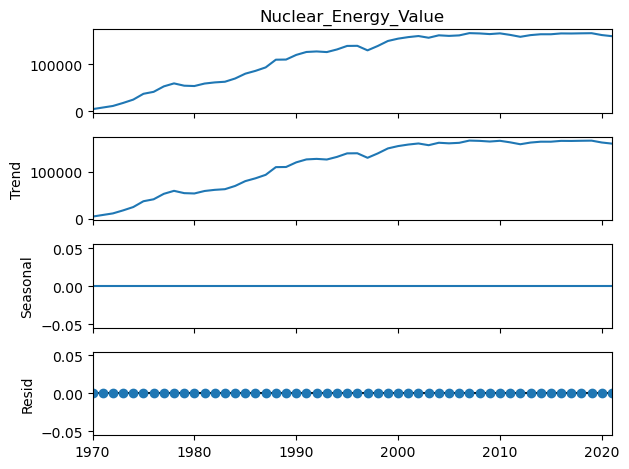

In [15]:
# Decompose time series into trend, seasonal, and residual components for Nuclear Energy Value
decomp = seasonal_decompose(df['Nuclear_Energy_Value'])
 
# Plot the decomposed time series.
decomp.plot();

# Nuclear Energy Interpretation
_______

For the trend plot, we observe an increase general trend of nuclear energy consumption from 1970 to 2021. However, we observe a slight dip in 1997 before the trend increases again afterwards. As for the seasonal trend, there doesn't seem to be any pattern and is at constant value of 0. For the residual trend, it appears that there is no pattern.


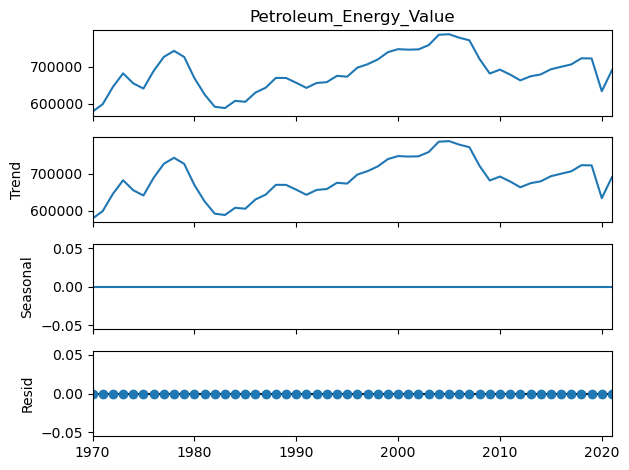

In [16]:
# Decompose time series into trend, seasonal, and residual components for Petroleum Energy Value
decomp = seasonal_decompose(df['Petroleum_Energy_Value'])
 
# Plot the decomposed time series.
decomp.plot();

# Petroleum Energy Interpretation
____

For the trend plot, we observe a general trend of petroleum energy consumption increasing from 1970 to 2021. However, we observe the petroleum energy consumption going down in 1977, going upw in 1980, and going back down in 1983. After that, the petroleum energy consumption trends gradually increases. As for the seasonal trend, there doesn't seem to be any pattern and is at constant value of 0. For the residual trend, it appears that there is no pattern.


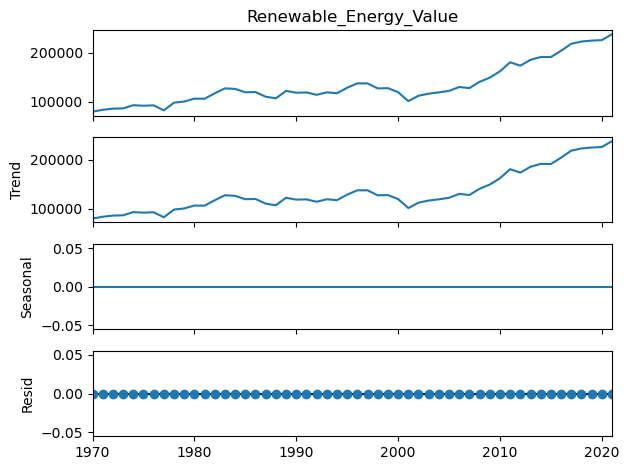

In [17]:
# Decompose time series into trend, seasonal, and residual components for Renewable Energy 
decomp = seasonal_decompose(df['Renewable_Energy_Value'])

# Plot the decomposed time series.
decomp.plot();

# Renewable Energy  Interpretation
_____

For the trend plot, we observe an increase in general trend of renewable energy consumption from 1970 to 2021. As for the seasonal trend, there doesn't seem to be any pattern and is at constant value of 0. For the residual trend, it appears that there is no pattern.

# ACF and PACF plots

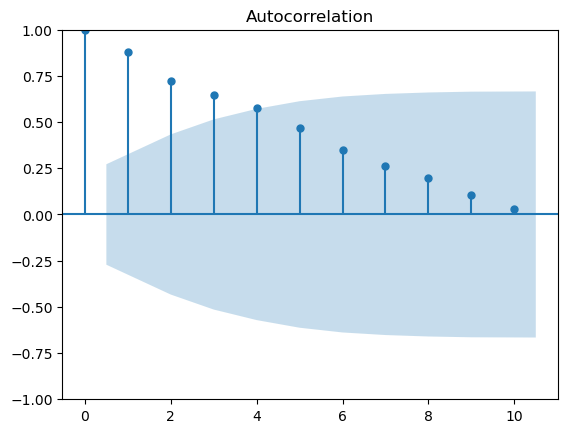

In [18]:
# Generate an ACF plot of the CO2 data with 10 time periods.
# when you have seasonality, this is the type of pattern
# you should see in your plot
plot_acf(df['CO2_Value'], lags=10);

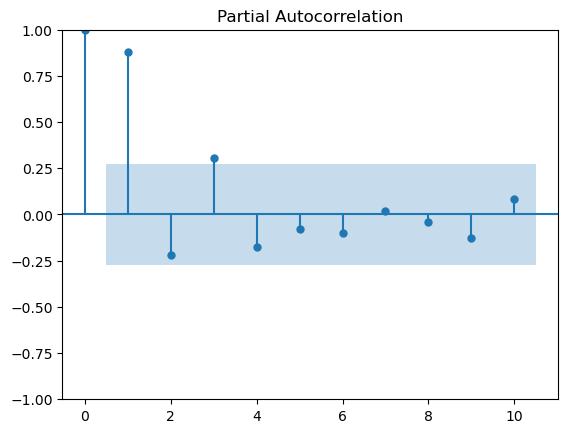

In [39]:
# Generate an PACF plot of the CO2 data with 10 time periods.
# when you have seasonality, this is the type of pattern
# you should see in your plot
plot_pacf(df['CO2_Value'], lags=10)

plt.savefig("CO2_pacf_plot.png", dpi = 300);

# CO2 ACF and PACF Plot Interpretations
______

As for ACF and PACF plots, we see small values having positive autocorrelations. Therefore there is a trend. On the other hand, for the PACF plot, we see some positive and some negative significant partial autocorrelations, which usually indicates strong seasonal fluctuations.

In [20]:
# Create a column called `lag_1` that lags CO2 Value by one month.
df['lag_1'] = df["CO2_Value"].shift(1)

# Create a column called `lag_2` that lags CO2 Value by two months.
df['lag_3'] = df["CO2_Value"].shift(3)

# Create a variable called `time` that takes on a value of 0 in January 1970,
# then increases by 1 each year until the end of the dataframe.
df['time'] = range(0, df.shape[0])

In [21]:
df.head()

,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value,lag_1,lag_3,time
Year,,,,,,,,,
1970-01-01,21.733333,240566.5294,425347.2941,4693.098039,578433.6078,79804.33333,NaN,NaN,0
1971-01-01,21.880392,227513.7451,438534.2549,8096.843137,598852.0588,83572.74510,21.733333,NaN,1
1972-01-01,22.996078,237441.7647,444754.8235,11446.098040,645473.6471,85921.68627,21.880392,NaN,2
1973-01-01,23.625490,254119.9804,443045.9608,17846.627450,682471.1569,86489.03922,22.996078,21.733333,3
1974-01-01,22.750980,248058.9608,426069.7647,24942.843140,655306.1569,92977.49020,23.625490,21.880392,4


In [22]:
df.tail()

,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value,lag_1,lag_3,time
Year,,,,,,,,,
2017-01-01,20.449020,271365.2745,550135.1176,165077.8235,706741.7843,218337.6863,20.582353,21.937255,47
2018-01-01,20.994118,259803.1176,611044.0784,165452.3137,723378.1373,222877.7059,20.449020,21.182353,48
2019-01-01,20.294118,221861.2941,632081.9216,165722.5882,722886.9804,224785.3137,20.994118,20.582353,49
2020-01-01,18.319608,180052.8824,618863.3529,161785.7647,633989.9804,225762.3137,20.294118,20.449020,50
2021-01-01,19.354902,206818.9412,620704.2745,159391.2549,691215.2745,237840.6275,18.319608,20.994118,51


# Train_Test Split
________


In [23]:
# Generate train/test split.
# when dealing with time series data, 
# make sure to make shuffle to False
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns =['CO2_Value']),
                                                    df['CO2_Value'],
                                                    test_size = 0.2, shuffle=False)

In [24]:
# Check shape to confirm we did this properly.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41, 8)
(11, 8)
(41,)
(11,)


In [25]:
# Import statsmodels.
import statsmodels.api as sm

In [26]:
# Before fitting a model in statsmodels, what do we need
# to do? (Hint: Think intercept.)
# for beta 0 create a constant of all 1
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)



# Confirm.
X_train.head()

,const,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value,lag_1,lag_3,time
Year,,,,,,,,,
1970-01-01,1.0,240566.5294,425347.2941,4693.098039,578433.6078,79804.33333,NaN,NaN,0
1971-01-01,1.0,227513.7451,438534.2549,8096.843137,598852.0588,83572.74510,21.733333,NaN,1
1972-01-01,1.0,237441.7647,444754.8235,11446.098040,645473.6471,85921.68627,21.880392,NaN,2
1973-01-01,1.0,254119.9804,443045.9608,17846.627450,682471.1569,86489.03922,22.996078,21.733333,3
1974-01-01,1.0,248058.9608,426069.7647,24942.843140,655306.1569,92977.49020,23.625490,21.880392,4


In [27]:
# statsmodels won't be able to handle missing values.
X_train.dropna(inplace=True)

y_train = y_train[X_train.index]

In [28]:
X_train.index

DatetimeIndex(['1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [29]:
# Remember that, in statsmodels, we pass our data 
# in when we instantiate the model

lm = sm.OLS(y_train, X_train)

In [30]:
# Then we fit our model.
lm_results = lm.fit()

In [31]:
# Display our summary
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:              CO2_Value   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     145.0
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           2.88e-21
Time:                        17:46:09   Log-Likelihood:                 6.0225
No. Observations:                  38   AIC:                             5.955
Df Residuals:                      29   BIC:                             20.69
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [32]:
# Generate predicted test values.
lm_results.predict(X_test)

Year
2011-01-01    22.306791
2012-01-01    21.286616
2013-01-01    21.597816
2014-01-01    21.642314
2015-01-01    20.792891
2016-01-01    20.097067
2017-01-01    19.636431
2018-01-01    20.025912
2019-01-01    19.261565
2020-01-01    16.925161
2021-01-01    17.637420
dtype: float64

In [33]:
# Import R2 score and MSE.
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
# Calculate R2 score.
r2_score(y_test, lm_results.predict(X_test))

0.45569836806655306

In [35]:
# Calculate RMSE.
mean_squared_error(y_test, lm_results.predict(X_test)) ** 0.5

0.8742712538919056

# Result Interpretations
_____

The R2 score turns out as 0.45, indicating that the model moderately fits the data and has moderate predictive power for explaining CO2 emissions based on the provided predictor variables. However, there is still room for improvement, and additional analysis may be necessary to refine the model further. 

As for the cofficients for each variable, here are the following interpretations:

* Coal_Value (2.156e-05): For each unit increase in coal energy consumption, the model predicts a CO2 emission increase of approximately 2.156e-05 units, holding all other predictors constant.

* Natural_Gas_Value (9.811e-06): For each unit increase in natural gas energy consumption, the model predicts a CO2 emission increase of approximately 9.811e-06 units, holding all other predictors constant.

* Nuclear_Energy_Value (4.067e-05): For each unit increase in nuclear energy consumption, the model predicts a CO2 emission increase of approximately 4.067e-05 units, holding all other predictors constant.

* Petroleum_Energy_Value (1.027e-05): For each unit increase in petroleum energy consumption, the model predicts a CO2 emission increase of approximately 1.027e-05 units, holding all other predictors constant.

* Renewable_Energy_Value (-2.865e-06): For each unit increase in renewable energy consumption, the model predicts a decrease in CO2 emission of approximately -2.865e-06 units, holding all other predictors constant. This negative coefficient suggests that higher renewable energy consumption is associated with lower CO2 emissions.

* lag_1 (0.0037): This coefficient represents the effect of the lagged value of the target variable (CO2 emission) at time t-1 on the current CO2 emission. For each unit increase in the lagged CO2 emission, the current CO2 emission is predicted to increase by approximately 0.0037 units.

* lag_3 (-0.1538): This coefficient represents the effect of the lagged value of the target variable (CO2 emission) at time t-3 on the current CO2 emission. For each unit increase in the CO2 emission three time steps ago, the current CO2 emission is predicted to decrease by approximately 0.1538 units.

* time (-0.2475): This coefficient represents the effect of time (assuming it's a continuous variable) on CO2 emission. For each unit increase in time, the model predicts a decrease in CO2 emission of approximately 0.2475 units, holding all other predictors constant.


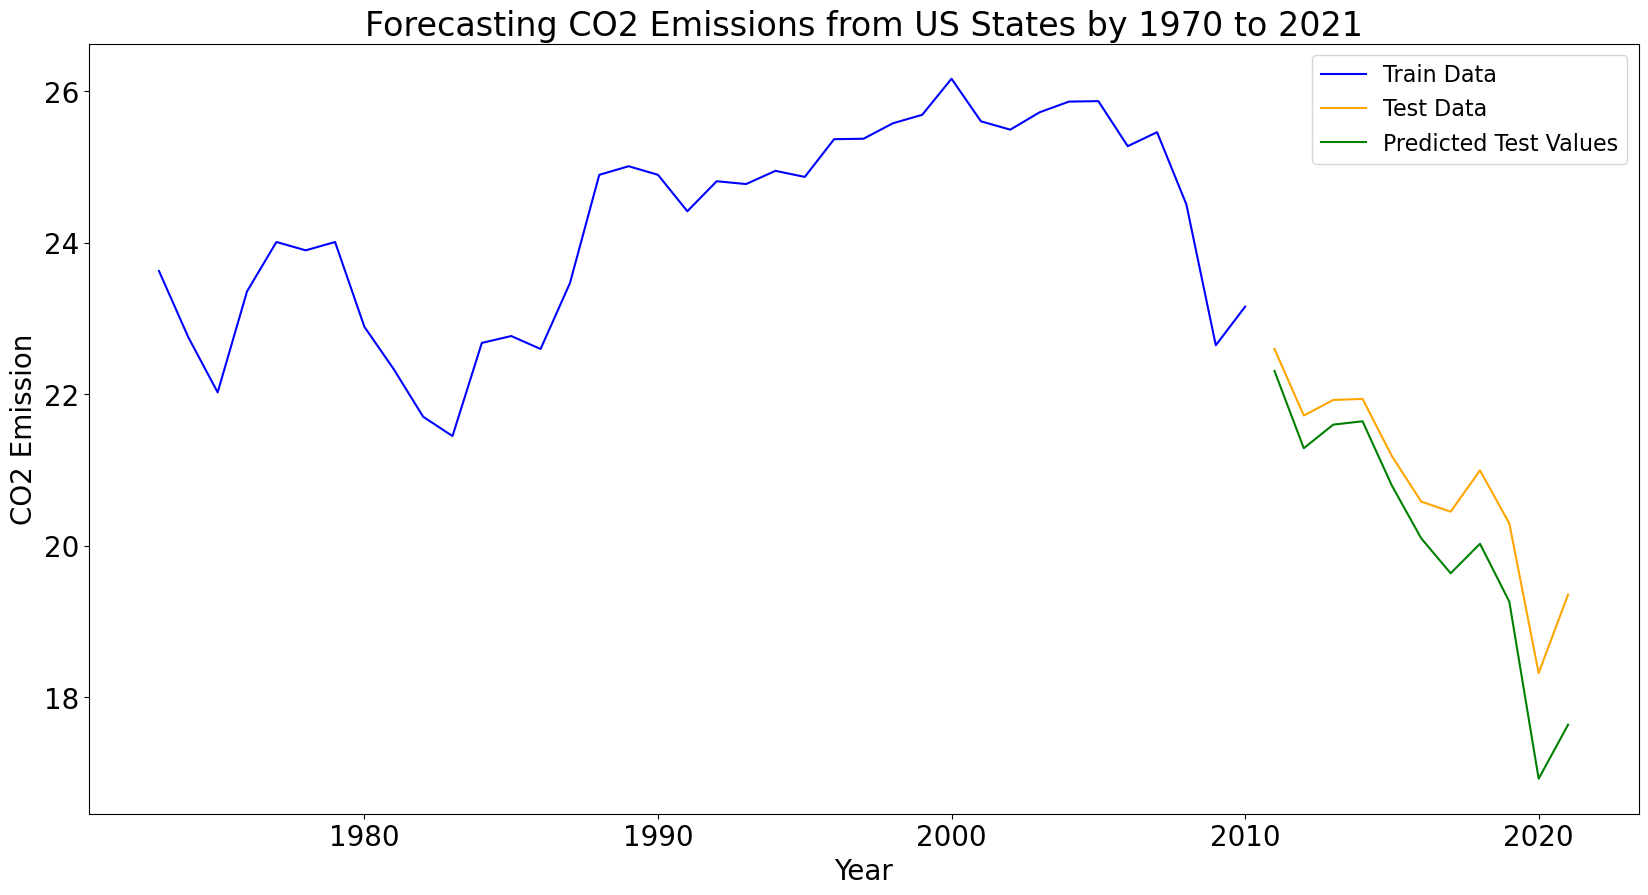

In [40]:
# Let's plot our predictions! 

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, label='Train Data', color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, label='Test Data', color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), label='Predicted Test Values', color = 'green')

# Set label.
plt.title(label = 'Forecasting CO2 Emissions from US States by 1970 to 2021', fontsize=24)
plt.xlabel(xlabel ='Year', fontsize=20)
plt.ylabel(ylabel = 'CO2 Emission', fontsize=20)

# Add legend
plt.legend(fontsize=16)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig("C02_predict_plot.png", dpi = 300);

# Interpretation 
_____

For this graph, the orange line represents the predicted CO2 emission while the green line represents the predicted values from all of the energy sources: coal, natural gas, nuclear, petroleum, and renewable energy. Based on this graph, we observe in this model that the CO2 emission is predicted to go down. However, since the predicted value is consistently falling below the actual test data, it suggests that the model may be underestimating the true values - suggesting that this model may have inherent biases or limitations that cause it to systematically underestimate the actual values. This bias could stem from the model structure, assumptions, or the choice of features used for prediction.

For next steps, we plan to investigate the underlying causes of underestimation and make appropriate adjustments to the model or its inputs.